# EDA ON STUDENTS PERFORMANCE

### Import the required libraries and read the data from the .csv file

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
students = pd.read_csv('StudentsPerformance (1).csv')

### Some basic operations to analyze dataset 

In [7]:
students.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [8]:
students.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [9]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
students.shape

(1000, 8)

#### Let's check for the missing values

In [12]:
students.isnull().sum()#NO NULL VALUE

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Catogory wise value counts

In [13]:
students.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [14]:
students['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [15]:
students['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

#### Visualizing no of students based on Race/ethnicity and parental level of education

<IPython.core.display.Javascript object>


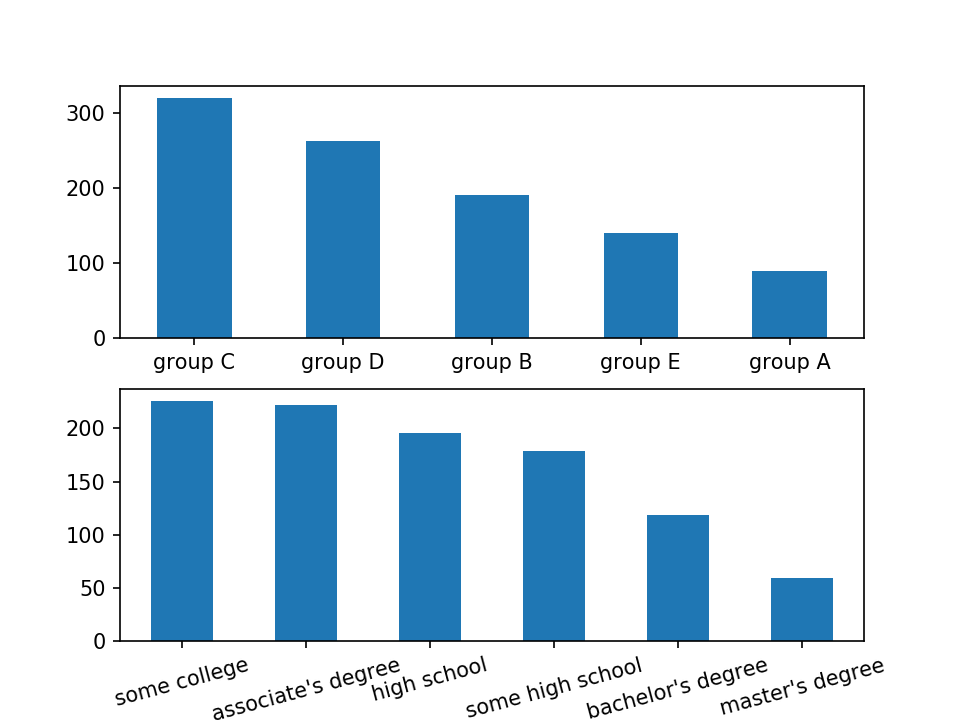

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

In [16]:
%matplotlib notebook
plt.subplot(2,1,1)
students['race/ethnicity'].value_counts().plot(kind='bar')
plt.xticks(rotation='0')
plt.subplot(2,1,2)
students['parental level of education'].value_counts().plot(kind='bar')
plt.xticks(rotation='15')

#### Histogram plot to see destribution of students based on maths,reading and writing score 

<IPython.core.display.Javascript object>


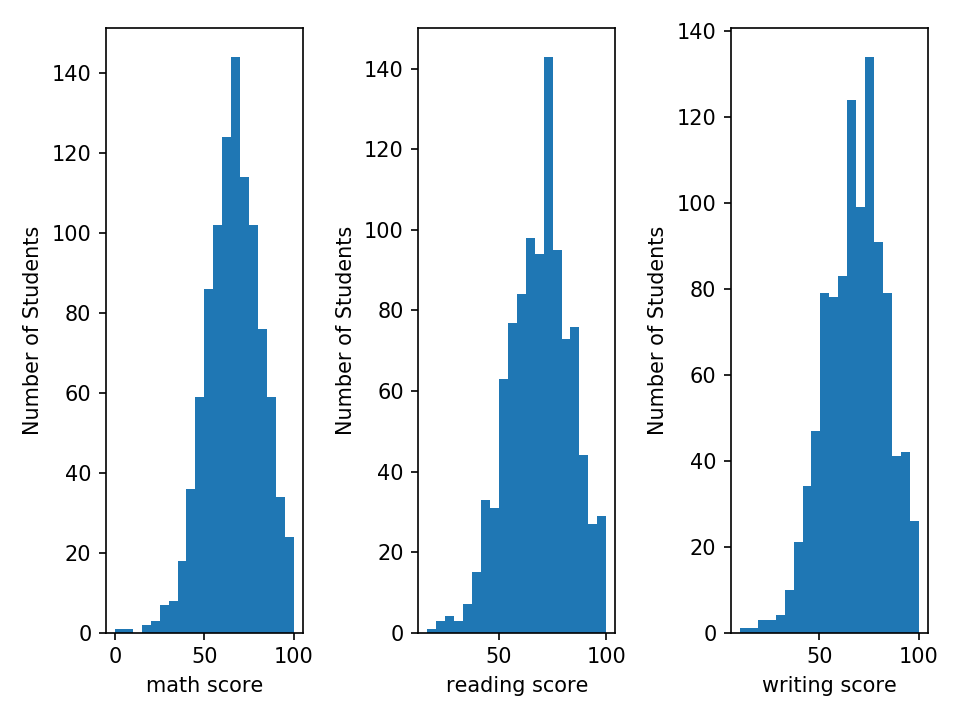

In [17]:
%matplotlib notebook
plt.subplot(1,3,1)
y = students['math score']
plt.xlabel('math score')
plt.ylabel('Number of Students')
plt.hist(y, bins=20)
plt.subplot(1,3,2)
y = students['reading score']
plt.xlabel('reading score')
plt.ylabel('Number of Students')
plt.hist(y, bins=20)
plt.subplot(1,3,3)
y = students['writing score']
plt.xlabel('writing score')
plt.ylabel('Number of Students')
plt.hist(y, bins=20)
plt.tight_layout()

### In the given visulization we can se how mean scores of subject are effected by race/ethnicity, parental level of education, gender, test preparation course

<IPython.core.display.Javascript object>


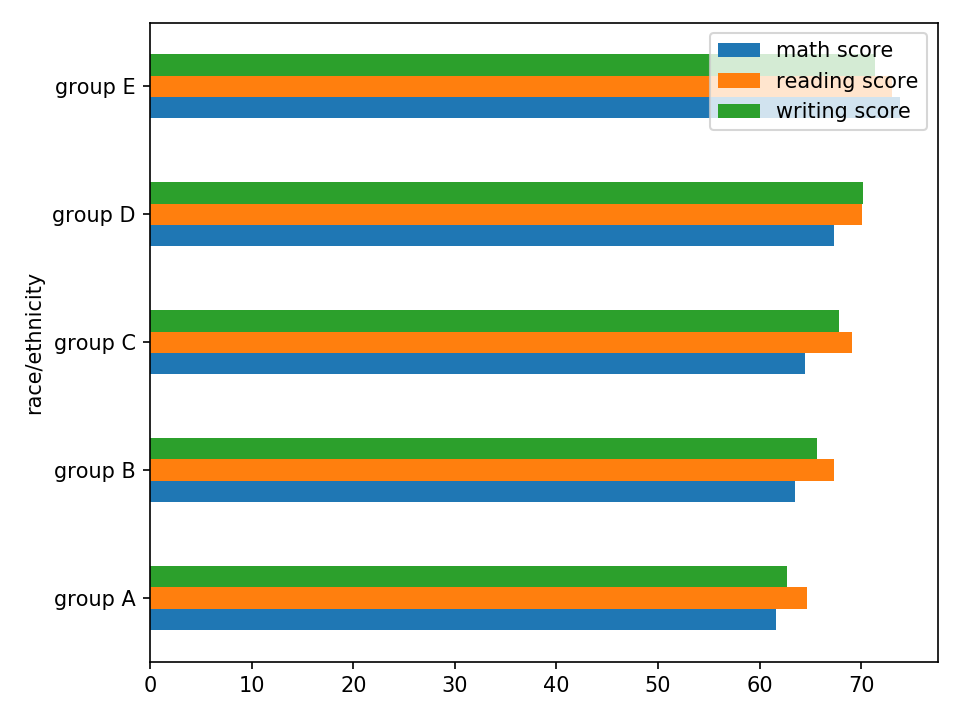

In [18]:
students.groupby('race/ethnicity').mean().plot(kind='barh')
plt.tight_layout()

<IPython.core.display.Javascript object>


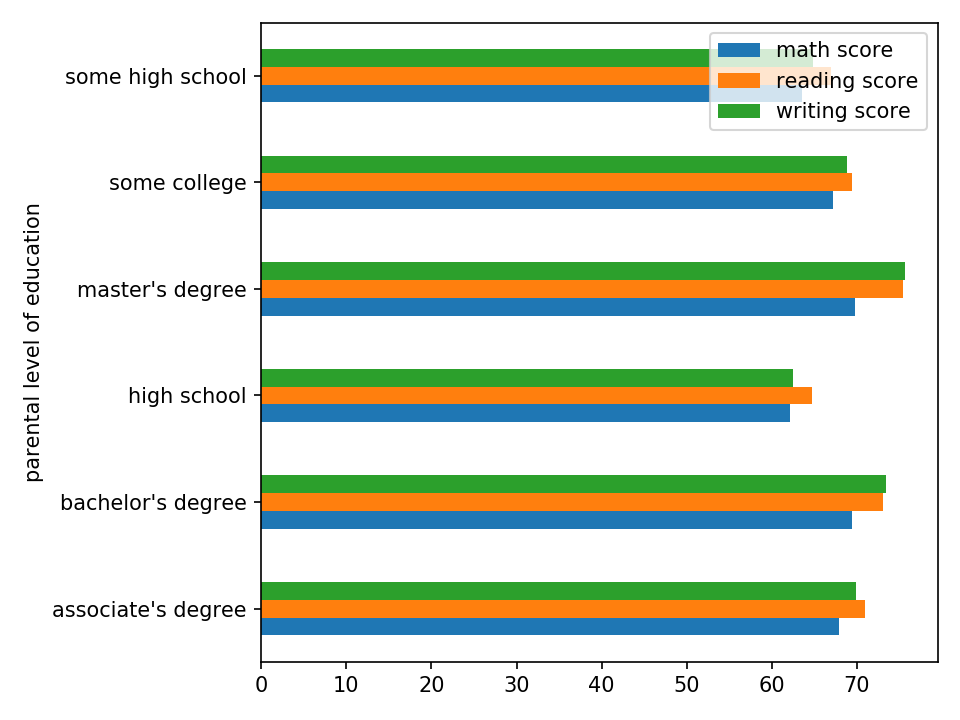

In [19]:
students.groupby('parental level of education').mean().plot(kind='barh')
plt.tight_layout()

<IPython.core.display.Javascript object>


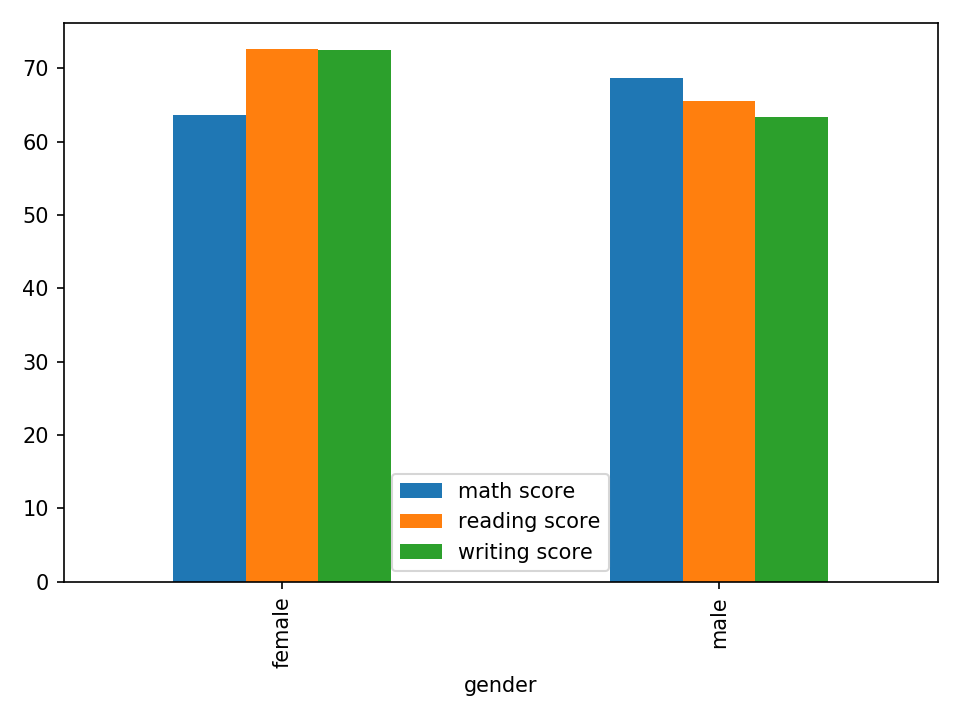

In [20]:
students.groupby('gender').mean().plot(kind='bar')
plt.tight_layout()

#### here we can see that male students are good in maths and female are good in readings

<IPython.core.display.Javascript object>


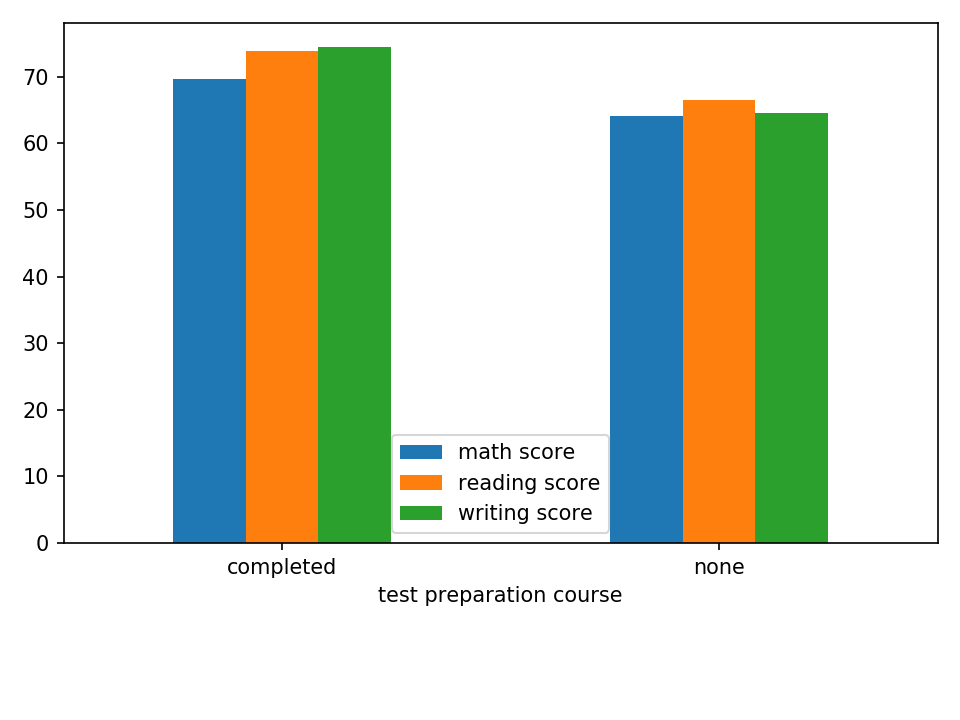

(array([0, 1]), <a list of 2 Text xticklabel objects>)

In [21]:
students.groupby('test preparation course').mean().plot(kind='bar')
plt.tight_layout()
plt.xticks(rotation='0')

#### Exact Data information according to race and gender.

In [22]:
students.groupby('gender').agg(['count', 'mean', 'min', 'max'])

math score                     reading score                      \
            count       mean min  max         count       mean min  max   
gender                                                                    
female        518  63.633205   0  100           518  72.608108  17  100   
male          482  68.728216  27  100           482  65.473029  23  100   

       writing score                      
               count       mean min  max  
gender                                    
female           518  72.467181  10  100  
male             482  63.311203  15  100

In [23]:
students.groupby('race/ethnicity').agg(['count', 'mean', 'min', 'max'])

math score                     reading score                 \
                    count       mean min  max         count       mean min   
race/ethnicity                                                               
group A                89  61.629213  28  100            89  64.674157  23   
group B               190  63.452632   8   97           190  67.352632  24   
group C               319  64.463950   0   98           319  69.103448  17   
group D               262  67.362595  26  100           262  70.030534  31   
group E               140  73.821429  30  100           140  73.028571  26   

                    writing score                      
                max         count       mean min  max  
race/ethnicity                                         
group A         100            89  62.674157  19   97  
group B          97           190  65.600000  15   96  
group C         100           319  67.827586  10  100  
group D         100           262  70.145038  32  100  
group E         100           140  71.407143  22  100

###  Let's have a look to the marks distribution using a countplot from seaborn package.

<IPython.core.display.Javascript object>


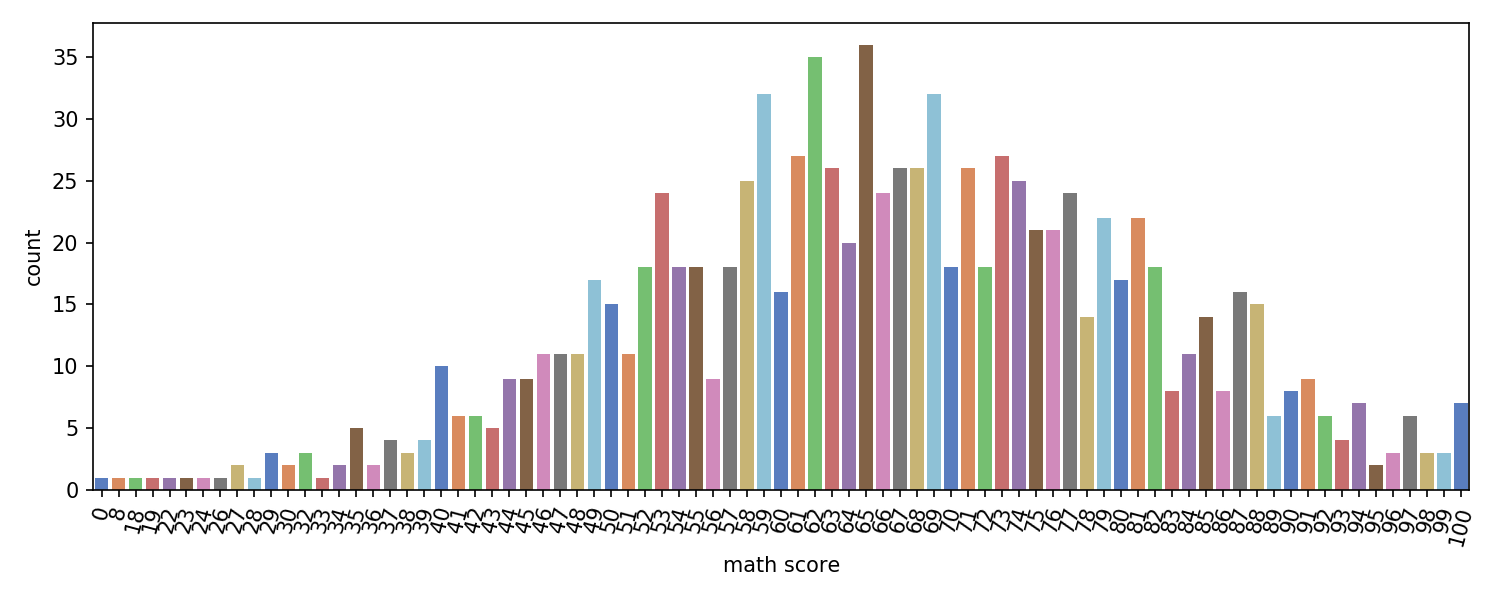

In [24]:
plt.figure(figsize=(10,4))
p=sns.countplot(x="math score" , data=students , palette = "muted")
plt.xticks(rotation='75')
plt.tight_layout()

<IPython.core.display.Javascript object>


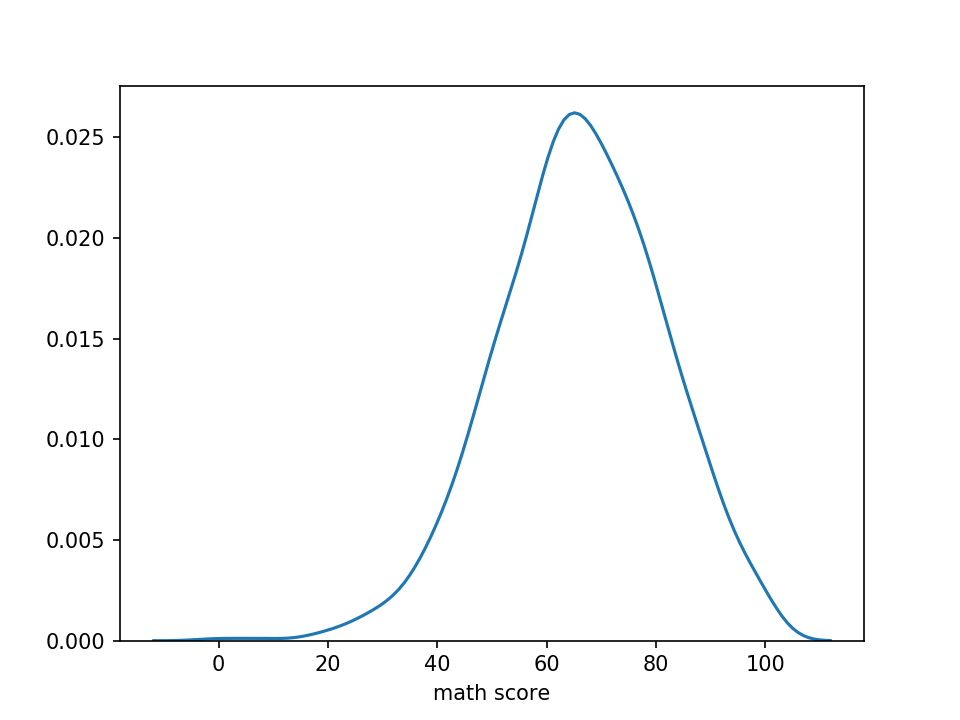

In [25]:
%matplotlib notebook
sns.distplot(students['math score'],kde=True,bins=30, hist=False)

<IPython.core.display.Javascript object>


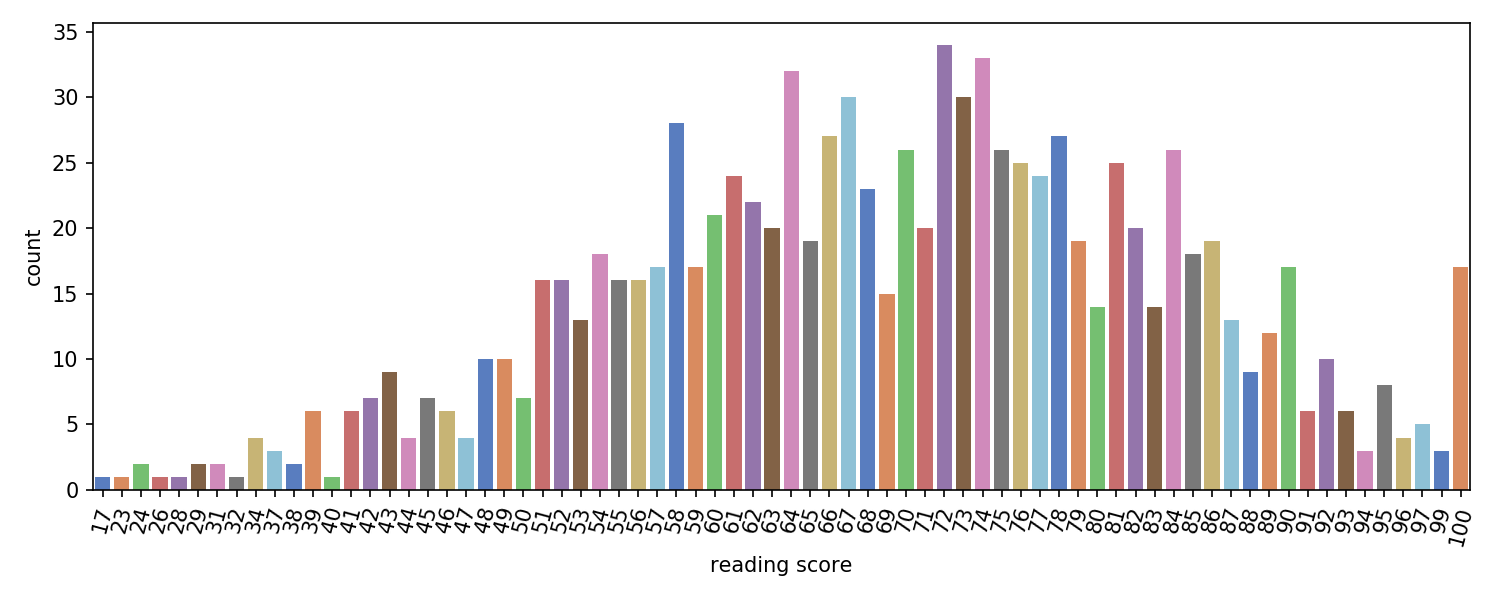

In [26]:
plt.figure(figsize=(10,4))
p=sns.countplot(x="reading score" , data=students , palette = "muted")
plt.xticks(rotation='75')
plt.tight_layout()

<IPython.core.display.Javascript object>


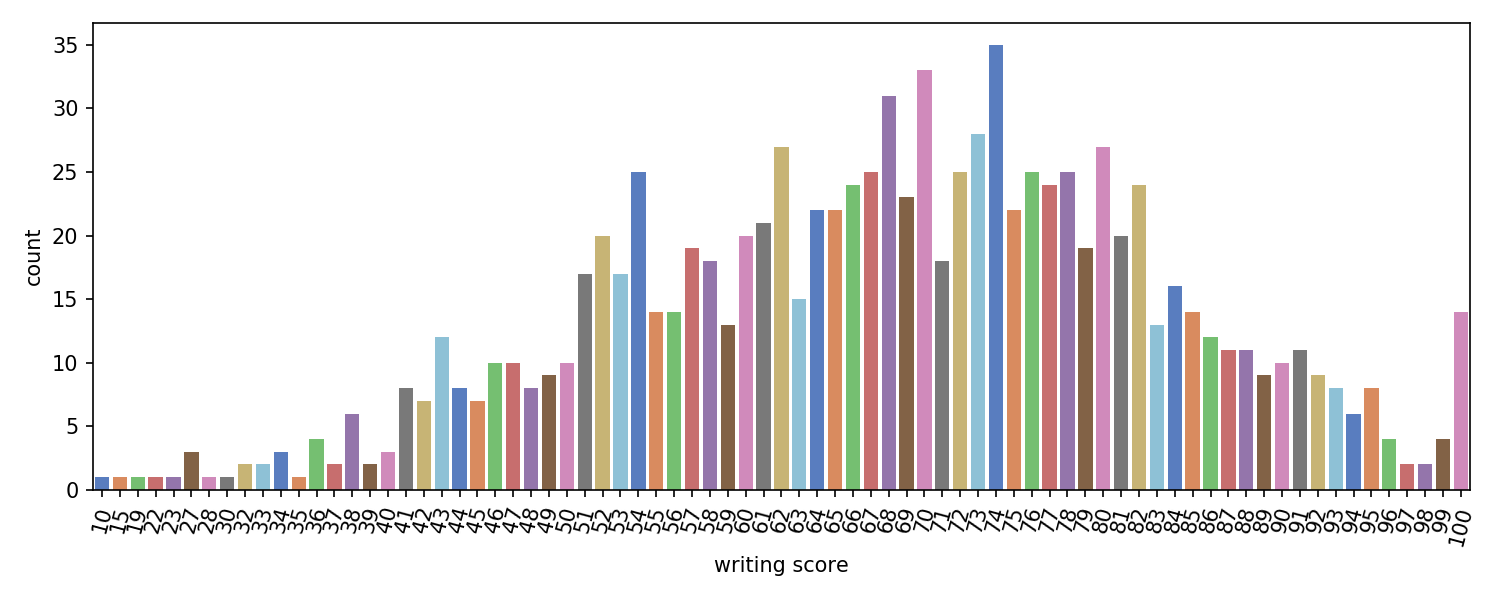

In [27]:
plt.figure(figsize=(10,4))
p=sns.countplot(x="writing score" , data=students , palette = "muted")
plt.xticks(rotation='75')
plt.tight_layout()

## To analyze data more correct
### Let's add two columns "Total marks" & "Percentage"
#### Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.
#### Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [28]:
students["Total marks"] = students["math score"] + students["reading score"] + students["writing score"]
students["Percentage"] = students["Total marks"] / 3
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Let assign grades to the marks
#### Considering 45 as pass marks

In [29]:
def Grade(marks):
    if marks >= 85:
        grade = 'A'
    elif marks >= 75:
        grade = 'B'
    elif marks >= 65:
        grade = 'C'
    elif marks >= 55:
        grade = 'D'
    elif marks >= 45:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
students["Grade_math"] = students["math score"].apply(lambda s: Grade(s))
students["Grade_reading"] = students["reading score"].apply(lambda s: Grade(s))
students["Grade_writing"] = students["writing score"].apply(lambda s: Grade(s))
students["Overall_grade"] = students["Percentage"].apply(lambda s: Grade(s))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,C,A,A,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,E,D,F,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B,B,B,B


### Let's check the distribution of the grades using a countplot.

<IPython.core.display.Javascript object>


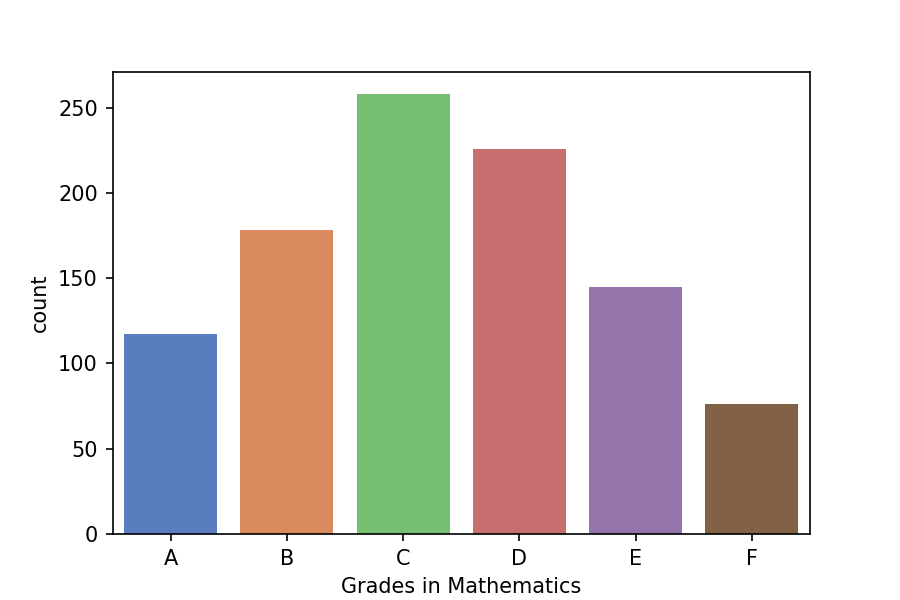

Text(0.5, 0, 'Grades in Mathematics')

In [30]:
plt.figure(figsize=(6,4))
grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = students, order = grade, palette = "muted")
plt.xlabel("Grades in Mathematics")

<IPython.core.display.Javascript object>


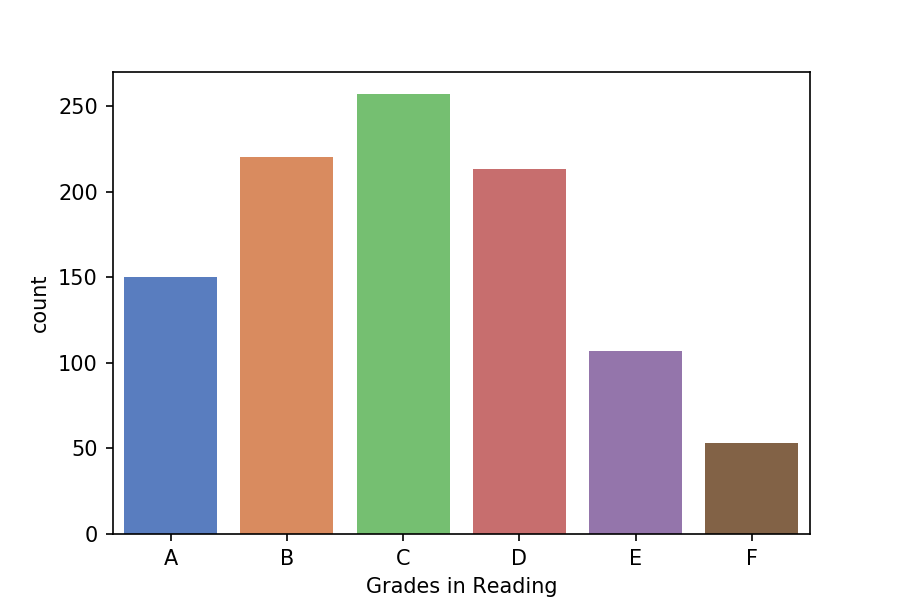

Text(0.5, 0, 'Grades in Reading')

In [31]:
plt.figure(figsize=(6,4))
grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_reading", data = students, order = grade, palette = "muted")
plt.xlabel("Grades in Reading")

<IPython.core.display.Javascript object>


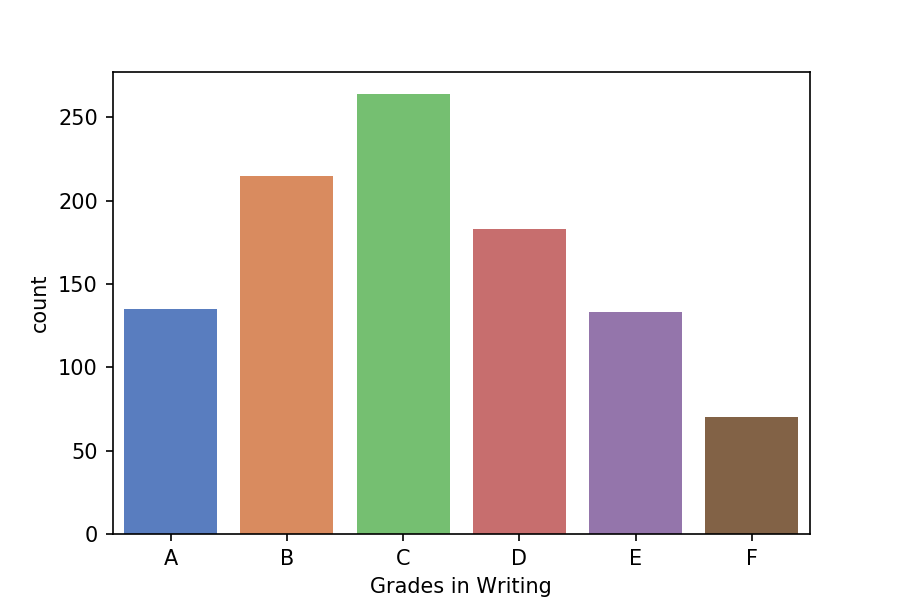

Text(0.5, 0, 'Grades in Writing')

In [32]:
plt.figure(figsize=(6,4))
grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_writing", data = students, order = grade, palette = "muted")
plt.xlabel("Grades in Writing")

<IPython.core.display.Javascript object>


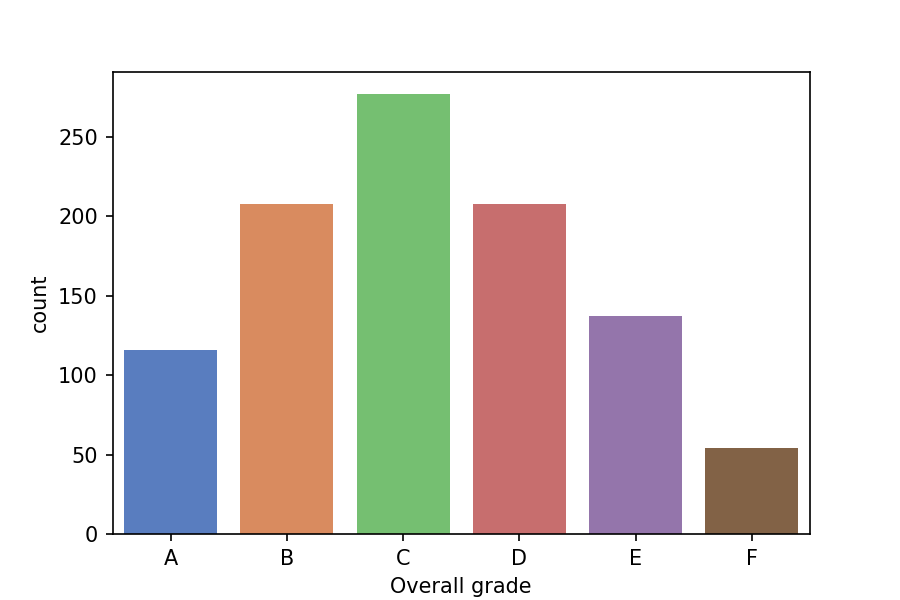

Text(0.5, 0, 'Overall grade')

In [33]:
plt.figure(figsize=(6,4))
grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Overall_grade", data = students, order = grade, palette = "muted")
plt.xlabel("Overall grade")

#### Now, we check how the students performed in this examination.

#### 54 students among 1000 students failed in examinations.

In [34]:
students.Overall_grade.value_counts()

C    277
B    208
D    208
E    137
A    116
F     54
Name: Overall_grade, dtype: int64

### Now we check the overall grade distribution of students of different lunch category using countplot

<IPython.core.display.Javascript object>


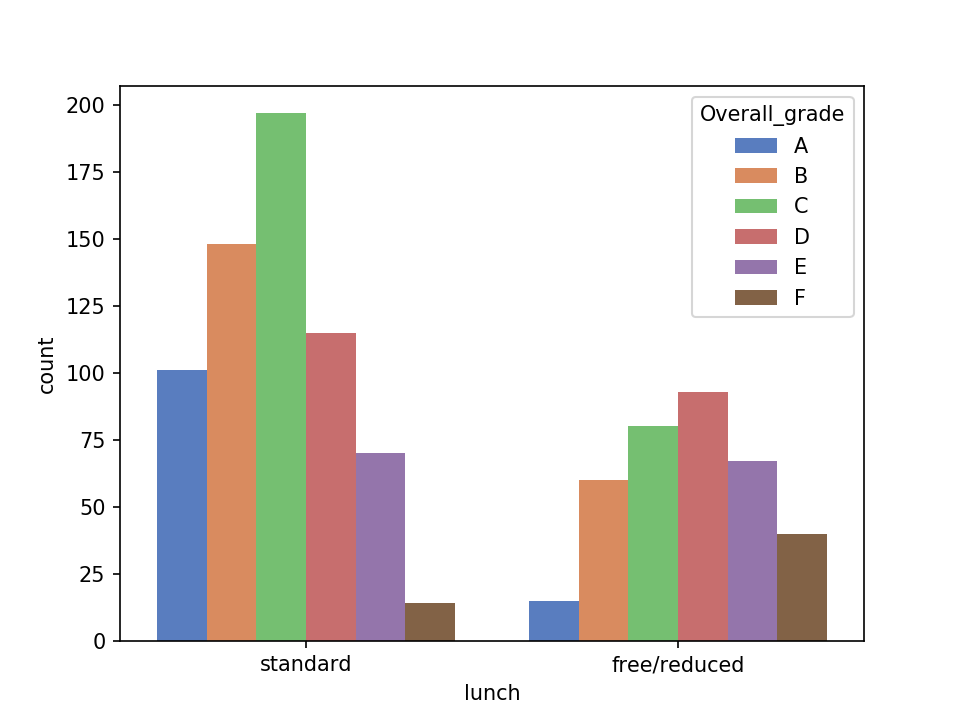

In [35]:
%matplotlib notebook
sns.countplot(x = "lunch", data = students, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "muted")


### Now we check the overall grade distribution of students of different race category using countplot

<IPython.core.display.Javascript object>


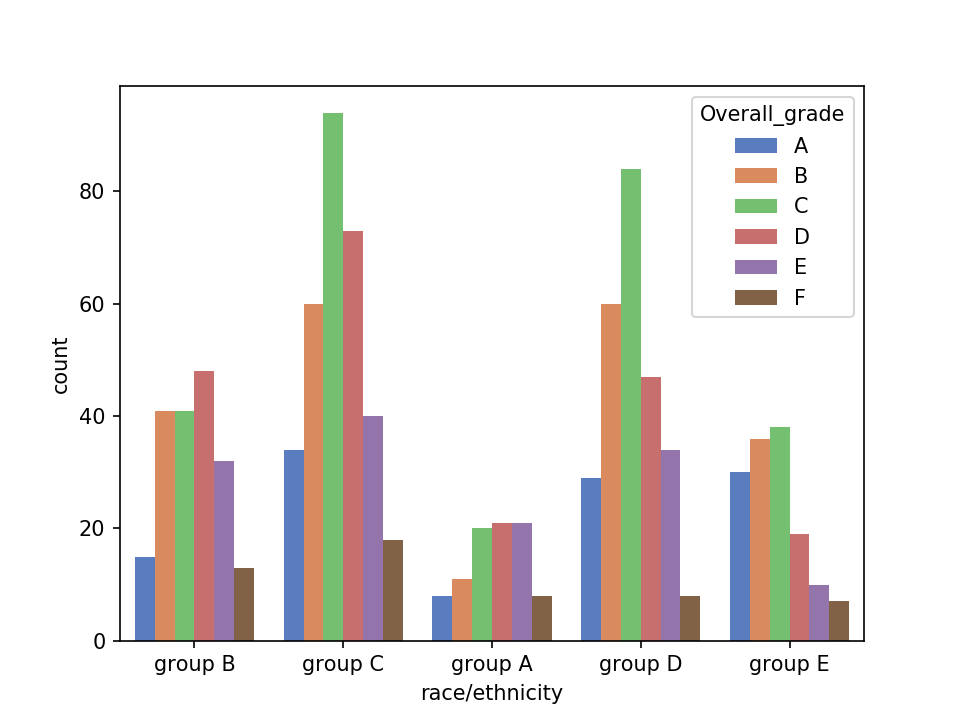

In [36]:
%matplotlib notebook
sns.countplot(x = "race/ethnicity", data = students, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "muted")
plt.show()

### Now we check the overall grade distribution of students of different parents level of education category using countplot

<IPython.core.display.Javascript object>


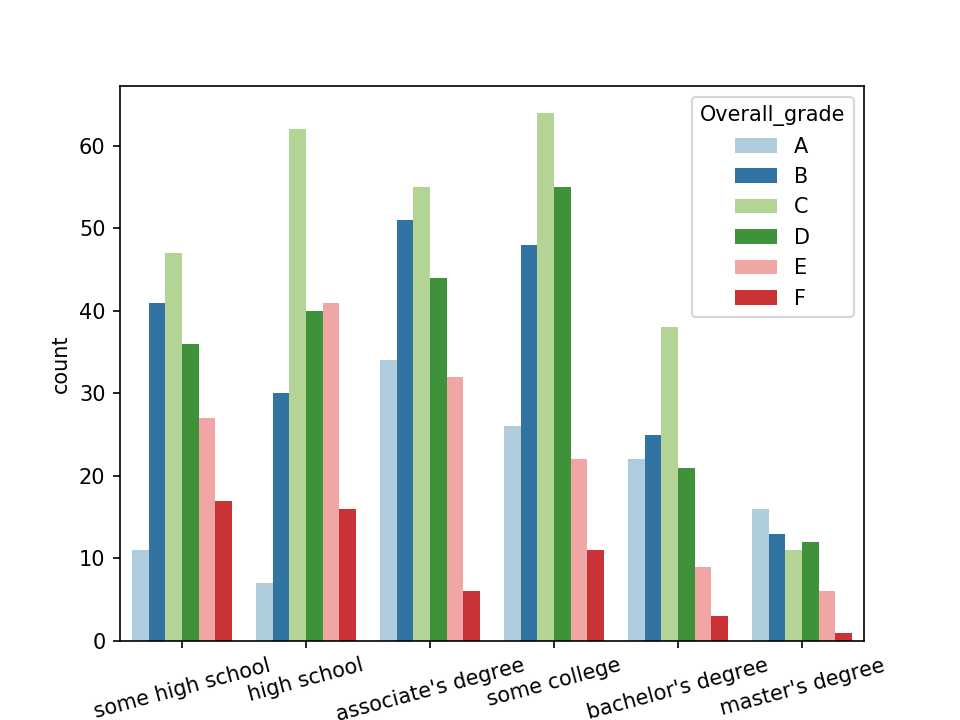

In [37]:
%matplotlib notebook
edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
sns.countplot(x='parental level of education', hue='Overall_grade',data=students, order=edu, hue_order = grade, palette = 'Paired')
plt.xlabel('Parents level of education')
plt.xticks(rotation='15')
plt.show()


### So, from the above graphs we can conclude that the student's whose parents have master's degree performed better than others, students who had completed their test preparation course scored better than the others , students with standard lunch scored better than the others,students of group D are scored very well among the ethnicity groups